In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

## Load data and separate train from test-phase

In [23]:
base_data = pd.read_csv('data.csv', index_col=0)
base_data.index = pd.to_datetime(base_data.index)
base_data = base_data.asfreq('H')
train_data = base_data[~base_data['north_load'].isna()]
train_data = train_data.asfreq('H')
target_data = base_data[base_data['north_load'].isna()]
target_data = target_data.asfreq('H')

## Fit AR(1) model

In [25]:
# Construct the model
mod = sm.tsa.SARIMAX(train_data.north_load, order=(1, 0, 0), trend='c')

# Estimate the parameters
res = mod.fit()

print(res.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96188D+00    |proj g|=  1.55241D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1      3      1     0     0   1.255D-05   7.962D+00
  F =   7.9618758241000620     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:             north_load   No. Observations:                39408
Model:               SARIMAX(1, 0, 0

### Get Results Through 10/31/21

In [28]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast(target_data.index[-1])

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

north_load                         mean      mean_se  mean_ci_lower  \
2021-07-01 00:00:00-06:00  16424.080958   739.181602   15208.235419   
2021-07-01 01:00:00-06:00  16403.223487  1036.252585   14698.739664   
2021-07-01 02:00:00-06:00  16382.731083  1258.152543   14313.254309   
2021-07-01 03:00:00-06:00  16362.597356  1440.281120   13993.545733   
2021-07-01 04:00:00-06:00  16342.816029  1596.501827   13716.804208   
...                                 ...          ...            ...   
2021-10-31 19:00:00-06:00  15232.426064  3968.161123    8705.381848   
2021-10-31 20:00:00-06:00  15232.426064  3968.161123    8705.381848   
2021-10-31 21:00:00-06:00  15232.426064  3968.161123    8705.381848   
2021-10-31 22:00:00-06:00  15232.426064  3968.161123    8705.381848   
2021-10-31 23:00:00-06:00  15232.426064  3968.161123    8705.381848   

north_load                 mean_ci_upper  
2021-07-01 00:00:00-06:00   17639.926497  
2021-07-01 01:00:00-06:00   18107.707310  
2021-07-01 02:00:0

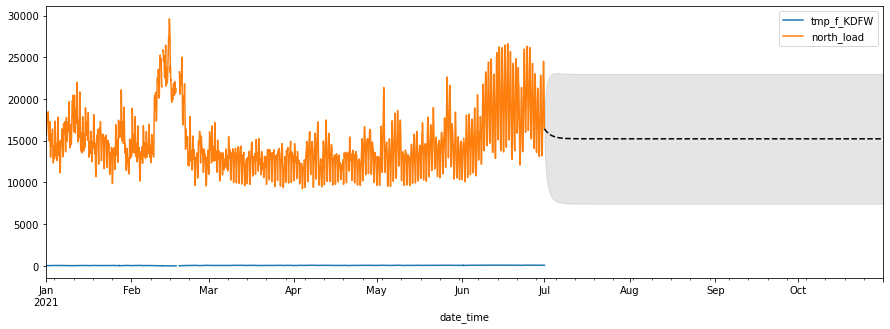

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
train_data.loc['2021':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast(target_data.index[-1]).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

## Fit AR(4) model (daily peaks/valleys last 2-3 hours per visualizations)

In [39]:
# Construct the model
mod = sm.tsa.SARIMAX(train_data.north_load, order=(4, 0, 0), trend='c')

# Estimate the parameters
res = mod.fit()

print(res.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06758D+00    |proj g|=  6.11998D-02

At iterate    5    f=  7.06372D+00    |proj g|=  9.04359D-03

At iterate   10    f=  7.06349D+00    |proj g|=  4.40088D-04

At iterate   15    f=  7.06319D+00    |proj g|=  3.26190D-03

At iterate   20    f=  7.05904D+00    |proj g|=  7.30203D-02

At iterate   25    f=  7.05800D+00    |proj g|=  3.72973D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   

### Get Results Through 10/31/21

In [40]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast(target_data.index[-1])

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

north_load                         mean      mean_se  mean_ci_lower  \
2021-07-01 00:00:00-06:00  14763.345089   295.433422   14277.400353   
2021-07-01 01:00:00-06:00  13382.577823   730.050998   12181.750792   
2021-07-01 02:00:00-06:00  12336.520031  1214.921811   10338.151484   
2021-07-01 03:00:00-06:00  11595.345507  1689.961172    8815.606743   
2021-07-01 04:00:00-06:00  11120.608080  2126.995993    7622.011006   
...                                 ...          ...            ...   
2021-10-31 19:00:00-06:00  15253.110657  3901.163571    8836.267608   
2021-10-31 20:00:00-06:00  15253.110657  3901.163571    8836.267608   
2021-10-31 21:00:00-06:00  15253.110657  3901.163571    8836.267608   
2021-10-31 22:00:00-06:00  15253.110657  3901.163571    8836.267608   
2021-10-31 23:00:00-06:00  15253.110657  3901.163571    8836.267608   

north_load                 mean_ci_upper  
2021-07-01 00:00:00-06:00   15249.289825  
2021-07-01 01:00:00-06:00   14583.404854  
2021-07-01 02:00:0

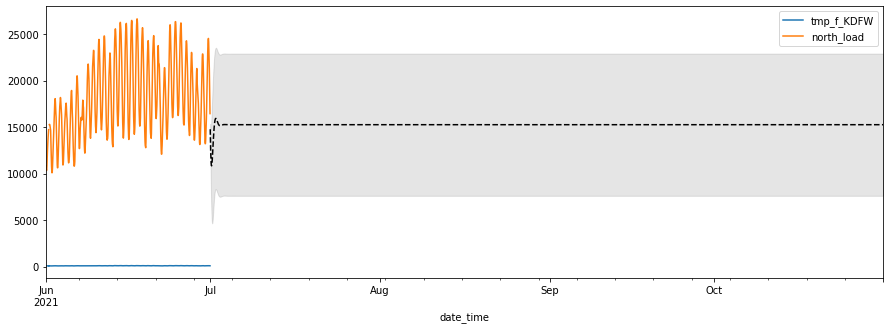

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
train_data.loc['2021-06-01':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast(target_data.index[-1]).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

## Fit AR(12) model (Half Day)

In [42]:
# Construct the model
mod = sm.tsa.SARIMAX(train_data.north_load, order=(12, 0, 0), trend='c')

# Estimate the parameters
res = mod.fit()

print(res.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02425D+00    |proj g|=  6.61069D-02

At iterate    5    f=  7.01837D+00    |proj g|=  3.77186D-03

At iterate   10    f=  7.01825D+00    |proj g|=  1.37522D-03

At iterate   15    f=  7.01818D+00    |proj g|=  1.99760D-03

At iterate   20    f=  7.01816D+00    |proj g|=  1.79164D-03

At iterate   25    f=  7.01726D+00    |proj g|=  1.43876D-02

At iterate   30    f=  7.01253D+00    |proj g|=  1.88268D-02

At iterate   35    f=  7.01205D+00    |proj g|=  3.71964D-03

At iterate   40    f=  7.01169D+00    |proj g|=  4.12875D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

### Get Results Through 10/31/21

In [43]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast(target_data.index[-1])

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

north_load                         mean      mean_se  mean_ci_lower  \
2021-07-01 00:00:00-06:00  14793.132128   281.973538   14329.326930   
2021-07-01 01:00:00-06:00  13567.582061   689.467362   12433.509169   
2021-07-01 02:00:00-06:00  12770.656089  1120.156291   10928.162951   
2021-07-01 03:00:00-06:00  12361.266169  1544.437571    9820.892430   
2021-07-01 04:00:00-06:00  12323.596301  1953.788902    9109.899539   
...                                 ...          ...            ...   
2021-10-31 19:00:00-06:00  15268.995373  3873.768577    8897.213080   
2021-10-31 20:00:00-06:00  15268.995373  3873.768577    8897.213080   
2021-10-31 21:00:00-06:00  15268.995373  3873.768577    8897.213080   
2021-10-31 22:00:00-06:00  15268.995373  3873.768577    8897.213080   
2021-10-31 23:00:00-06:00  15268.995373  3873.768577    8897.213080   

north_load                 mean_ci_upper  
2021-07-01 00:00:00-06:00   15256.937325  
2021-07-01 01:00:00-06:00   14701.654952  
2021-07-01 02:00:0

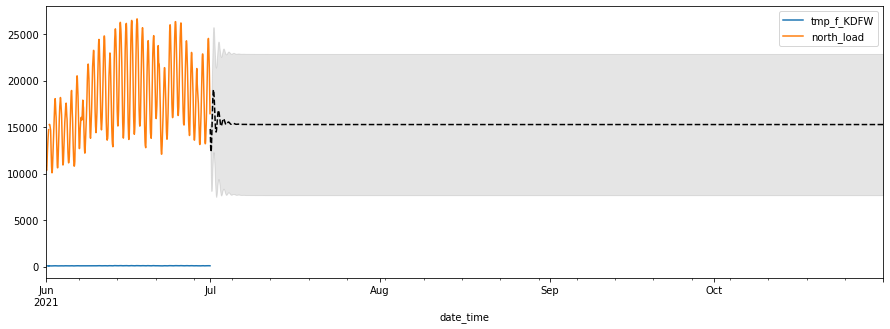

In [44]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
train_data.loc['2021-06-01':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast(target_data.index[-1]).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

## Fit AR(24) model (Full Day)

In [45]:
# Construct the model
mod = sm.tsa.SARIMAX(train_data.north_load, order=(24, 0, 0), trend='c')

# Estimate the parameters
res = mod.fit()

print(res.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.75873D+00    |proj g|=  1.04721D-01


 This problem is unconstrained.



At iterate    5    f=  6.75283D+00    |proj g|=  1.97833D-02

At iterate   10    f=  6.75177D+00    |proj g|=  3.30577D-03

At iterate   15    f=  6.75173D+00    |proj g|=  1.10671D-03

At iterate   20    f=  6.75169D+00    |proj g|=  3.37809D-03

At iterate   25    f=  6.75168D+00    |proj g|=  3.82374D-03

At iterate   30    f=  6.75166D+00    |proj g|=  2.07772D-03

At iterate   35    f=  6.75155D+00    |proj g|=  4.65648D-03

At iterate   40    f=  6.75146D+00    |proj g|=  2.81666D-03

At iterate   45    f=  6.75139D+00    |proj g|=  3.59937D-03


/home/esherma9/miniconda3/envs/NT_Demand/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.75125D+00    |proj g|=  6.06919D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   26     50     54      1     0     0   6.069D-03   6.751D+00
  F =   6.7512454427456721     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                               SARIMAX Results                                
Dep. Variable:             north_load   No. Observations:                39408
Model:              SARIMAX(24, 0, 0)   Log Likelihood             -266053.080
Date:                Thu, 16 Jun 2022   AIC                         532158.161
Time:                        15:19:11   BIC  

### Get Results Through 10/31/21

In [46]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast(target_data.index[-1])

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

north_load                         mean      mean_se  mean_ci_lower  \
2021-07-01 00:00:00-06:00  14982.719391   242.328339   14584.124744   
2021-07-01 01:00:00-06:00  14048.326331   520.684054   13191.877276   
2021-07-01 02:00:00-06:00  13539.561753   755.076272   12297.571809   
2021-07-01 03:00:00-06:00  13391.189522   947.046238   11833.437083   
2021-07-01 04:00:00-06:00  13662.482691  1110.349608   11836.120112   
...                                 ...          ...            ...   
2021-10-31 19:00:00-06:00  15703.957050  4833.818873    7753.032545   
2021-10-31 20:00:00-06:00  15674.402080  4833.819513    7723.476521   
2021-10-31 21:00:00-06:00  15644.947315  4833.819729    7694.021401   
2021-10-31 22:00:00-06:00  15617.599182  4833.819739    7666.673252   
2021-10-31 23:00:00-06:00  15594.215337  4833.819814    7643.289284   

north_load                 mean_ci_upper  
2021-07-01 00:00:00-06:00   15381.314038  
2021-07-01 01:00:00-06:00   14904.775386  
2021-07-01 02:00:0

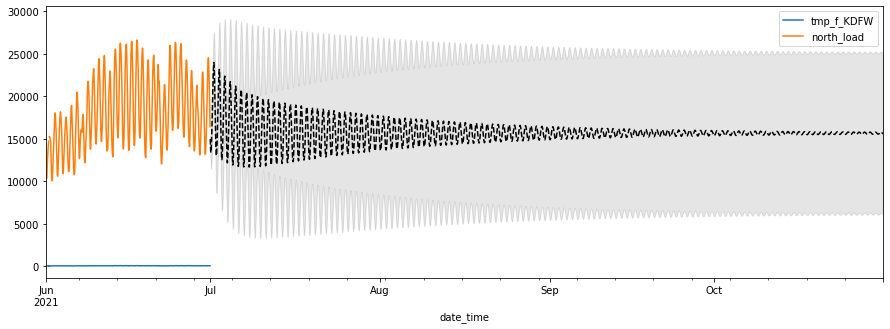

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
train_data.loc['2021-06-01':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast('2021-10-31 23:00:00-06:00').summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

### Check in-data fit

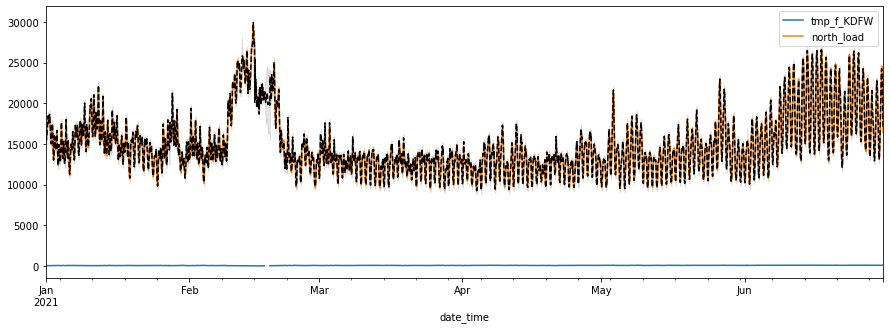

In [60]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
train_data.loc['2021-01-01':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_prediction('2021-01-01 00:00:00-06:00').summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

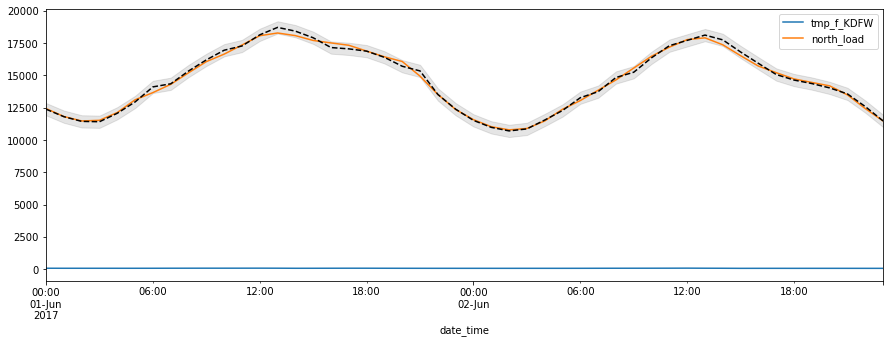

In [63]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
train_data.loc['2017-06-01':'2017-06-02'].plot(ax=ax)

# Construct the forecasts
fcast = res.get_prediction('2017-06-01 00:00:00-06:00', '2017-06-02 23:00:00-06:00').summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

In the above, we see that we're fitting _very_ well on training data. In fact, perhaps we're overfitting a bit?

At this point, clearly we are not getting reasonable behavior with the AR model alone. The effect of the past is decaying very quickly as we forecast further into the future. We'd hope to, at least, capture intra-day cycles. Seasonality (load should go down a bit in October) would be nice.

Possible solutions include:
1) Getting a notion of 'statefulness'. This can be accomplished by using the residuals in the training data (i.e. an ARMA model).
2) Using the weather data as endogenous variables.

I'll do the former below and the latter in another notebook. One hypothesis is that the ARMA version will still not adequately capture periodicity. In that case, combining ARMA with FFT might be a better idea, since FFT could help capture periodicity with fewer params than ARMA(24, x, x) and, after all, we're already fitting quite well on the training data.

## Fit ARMA(24, 2) model (Full Day)

In [88]:
# Construct the model
mod = sm.tsa.SARIMAX(train_data.north_load, order=(24, 1, 8), trend='c')

# Estimate the parameters
res = mod.fit()

print(res.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           34     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74958D+00    |proj g|=  3.64121D-01


 This problem is unconstrained.



At iterate    5    f=  6.63912D+00    |proj g|=  1.03153D-01

At iterate   10    f=  6.61108D+00    |proj g|=  3.27763D-02

At iterate   15    f=  6.60745D+00    |proj g|=  2.60788D-02

At iterate   20    f=  6.60399D+00    |proj g|=  2.45128D-02

At iterate   25    f=  6.59976D+00    |proj g|=  4.91667D-02

At iterate   30    f=  6.59785D+00    |proj g|=  3.49483D-02

At iterate   35    f=  6.59629D+00    |proj g|=  2.64228D-02

At iterate   40    f=  6.59583D+00    |proj g|=  7.26990D-03

At iterate   45    f=  6.59540D+00    |proj g|=  7.00170D-03


/home/esherma9/miniconda3/envs/NT_Demand/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.59532D+00    |proj g|=  2.64484D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   34     50     56      1     0     0   2.645D-03   6.595D+00
  F =   6.5953205684424363     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                               SARIMAX Results                                
Dep. Variable:             north_load   No. Observations:                39408
Model:              SARIMAX(24, 1, 8)   Log Likelihood             -259908.393
Date:                Thu, 16 Jun 2022   AIC                         519884.786
Time:                        17:23:20   BIC  

### Get Results Through 10/31/21

In [89]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast(target_data.index[-1])

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

north_load                         mean       mean_se  mean_ci_lower  \
2021-07-01 00:00:00-06:00  14951.523710    219.537059   14590.417383   
2021-07-01 01:00:00-06:00  13916.589829    493.523461   13104.815974   
2021-07-01 02:00:00-06:00  13294.923945    758.536460   12047.242498   
2021-07-01 03:00:00-06:00  13096.375305    996.002240   11458.097407   
2021-07-01 04:00:00-06:00  13359.777531   1204.074789   11379.250748   
...                                 ...           ...            ...   
2021-10-31 19:00:00-06:00  16831.833549  24497.827279  -23463.506504   
2021-10-31 20:00:00-06:00  16448.790707  24502.679212  -23854.530065   
2021-10-31 21:00:00-06:00  16236.567640  24508.131799  -24075.721839   
2021-10-31 22:00:00-06:00  16209.601341  24514.084958  -24112.480213   
2021-10-31 23:00:00-06:00  16369.648278  24520.385250  -23962.796335   

north_load                 mean_ci_upper  
2021-07-01 00:00:00-06:00   15312.630037  
2021-07-01 01:00:00-06:00   14728.363684  
2021-0

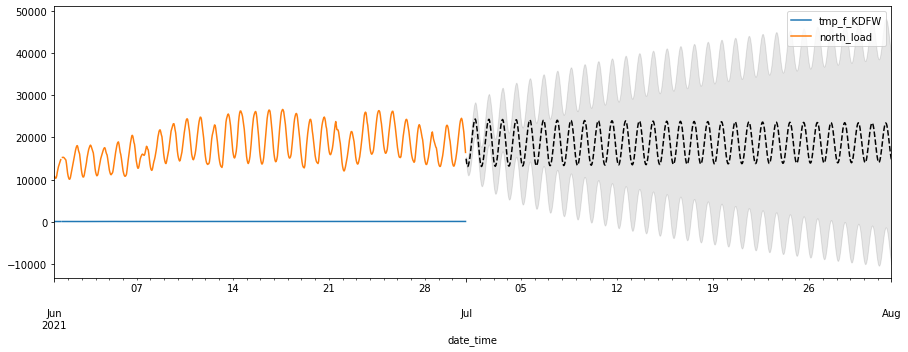

In [98]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
train_data.loc['2021-06-01':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast('2021-08-01 00:00:00-0600').summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

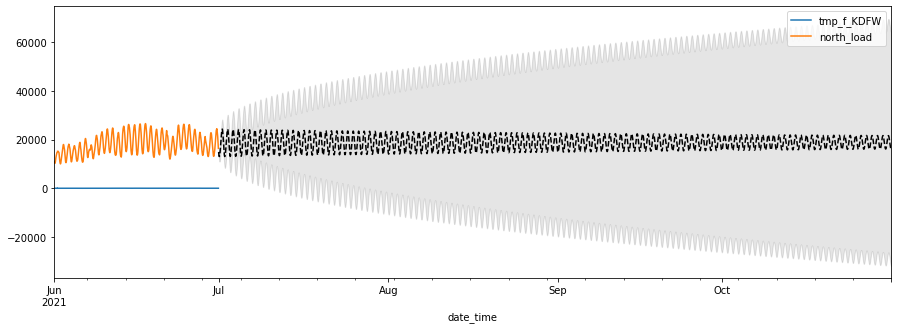

In [99]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
train_data.loc['2021-06-01':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast(target_data.index[-1]).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

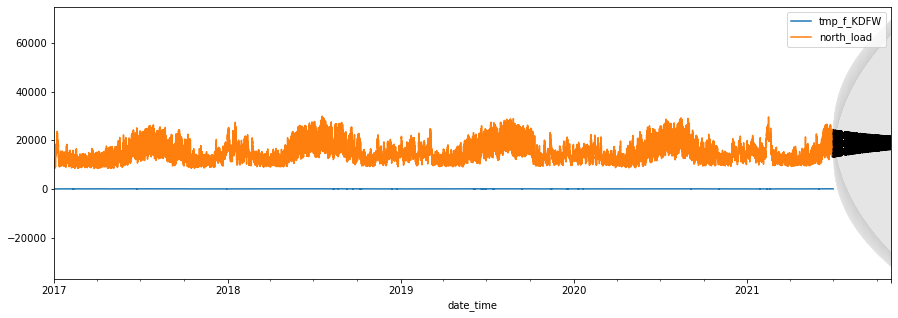

In [100]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
train_data.loc['2017-01-01':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast(target_data.index[-1]).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

## Analysis
At this point we're getting ok _daily_ behavior. We see clear daily cycles.

We are still getting a decay in daily variance over time, which is not so good.

We are not getting seasonal effect. There should be decreasing average demand over the target period (i.e. lower demand at Halloween) due to decreasing temperature.

MOST logical next step is to incorporate temperature. In a real-world case, we wouldn't have contemporaneous temperatures at the time of load prediction (though we'd perhaps have reasonable forecasts). For that reason, it might be worthwhile to return to this univariate approach later to try to get a more reasonable forecast that captures the temp-induced seasonality without using temp.